# Laboratory Exercise 2 - Starter (2 points)

In this assignment, you will build a model to predict laptop prices using the provided `laptops.csv` dataset.

Your tasks are as follows:

1. Perform Exploratory Data Analysis (EDA) to understand the dataset.
2. Preprocess the data to prepare it for modeling.
3. Train and evaluate a machine learning model to predict laptop prices.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_2_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_2_12346.ipynb`.

In [214]:
import os
import hashlib
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    PolynomialFeatures,
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [215]:
os.environ["PYTHONHASHSEED"] = "42"
random.seed(42)
np.random.seed(42)

RANDOM_STATE = 42

In [216]:
def hash_columns(columns):
    col_str = ",".join(sorted(columns))
    return hashlib.sha256(col_str.encode()).hexdigest()

In [217]:
def hash_series(series):
    series_str = ",".join(map(str, series.values))
    return hashlib.sha256(series_str.encode()).hexdigest()

In [218]:
def hash_data_frame(df):
    df_sorted = df.sort_index(axis=1).sort_values(by=list(df.columns))
    return hashlib.sha256(pd.util.hash_pandas_object(df_sorted, index=True).values).hexdigest()

In [219]:
df = pd.read_csv("laptops.csv")

In [220]:
df.head()

,Brand,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro)
0,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,NaN,True,No OS,1.86,575.00
1,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00
2,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00
3,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,NaN,No OS,1.86,393.90
4,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,NaN,344.99


In [221]:
### MANUALLY GRADED TASK
def calculate_descriptive_statistics(df):
    """
    Compute the descriptive statistics for all numeric columns in the dataset.
    The statistics should include: count, mean, standard deviation (std), minimum,
    25th percentile, median, 75th percentile, and maximum.
    
    Return the result as a `pd.DataFrame.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    return df.describe()

In [222]:
calculate_descriptive_statistics(df)

,Dimension (in),CPU Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,791.000000,791.000000,791.000000,691.000000,791.000000
mean,15.287611,2.388369,8.601770,2.151999,1113.184956
std,1.224031,0.371062,5.173638,0.654401,601.993594
min,12.500000,1.200000,4.000000,0.910000,339.000000
25%,14.000000,2.000000,4.000000,1.725000,684.995000
50%,15.600000,2.500000,8.000000,2.100000,973.000000
75%,15.600000,2.700000,8.000000,2.400000,1349.000000
max,17.300000,2.900000,64.000000,4.700000,3975.000000


In [223]:
### MANUALLY GRADED TASK
def plot_pairwise_relationships(df):
    """
    Create pairwise plots to visualize the relationships between all numerical variables
    in the dataset using scatter plots and histograms.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    return sns.pairplot(df)

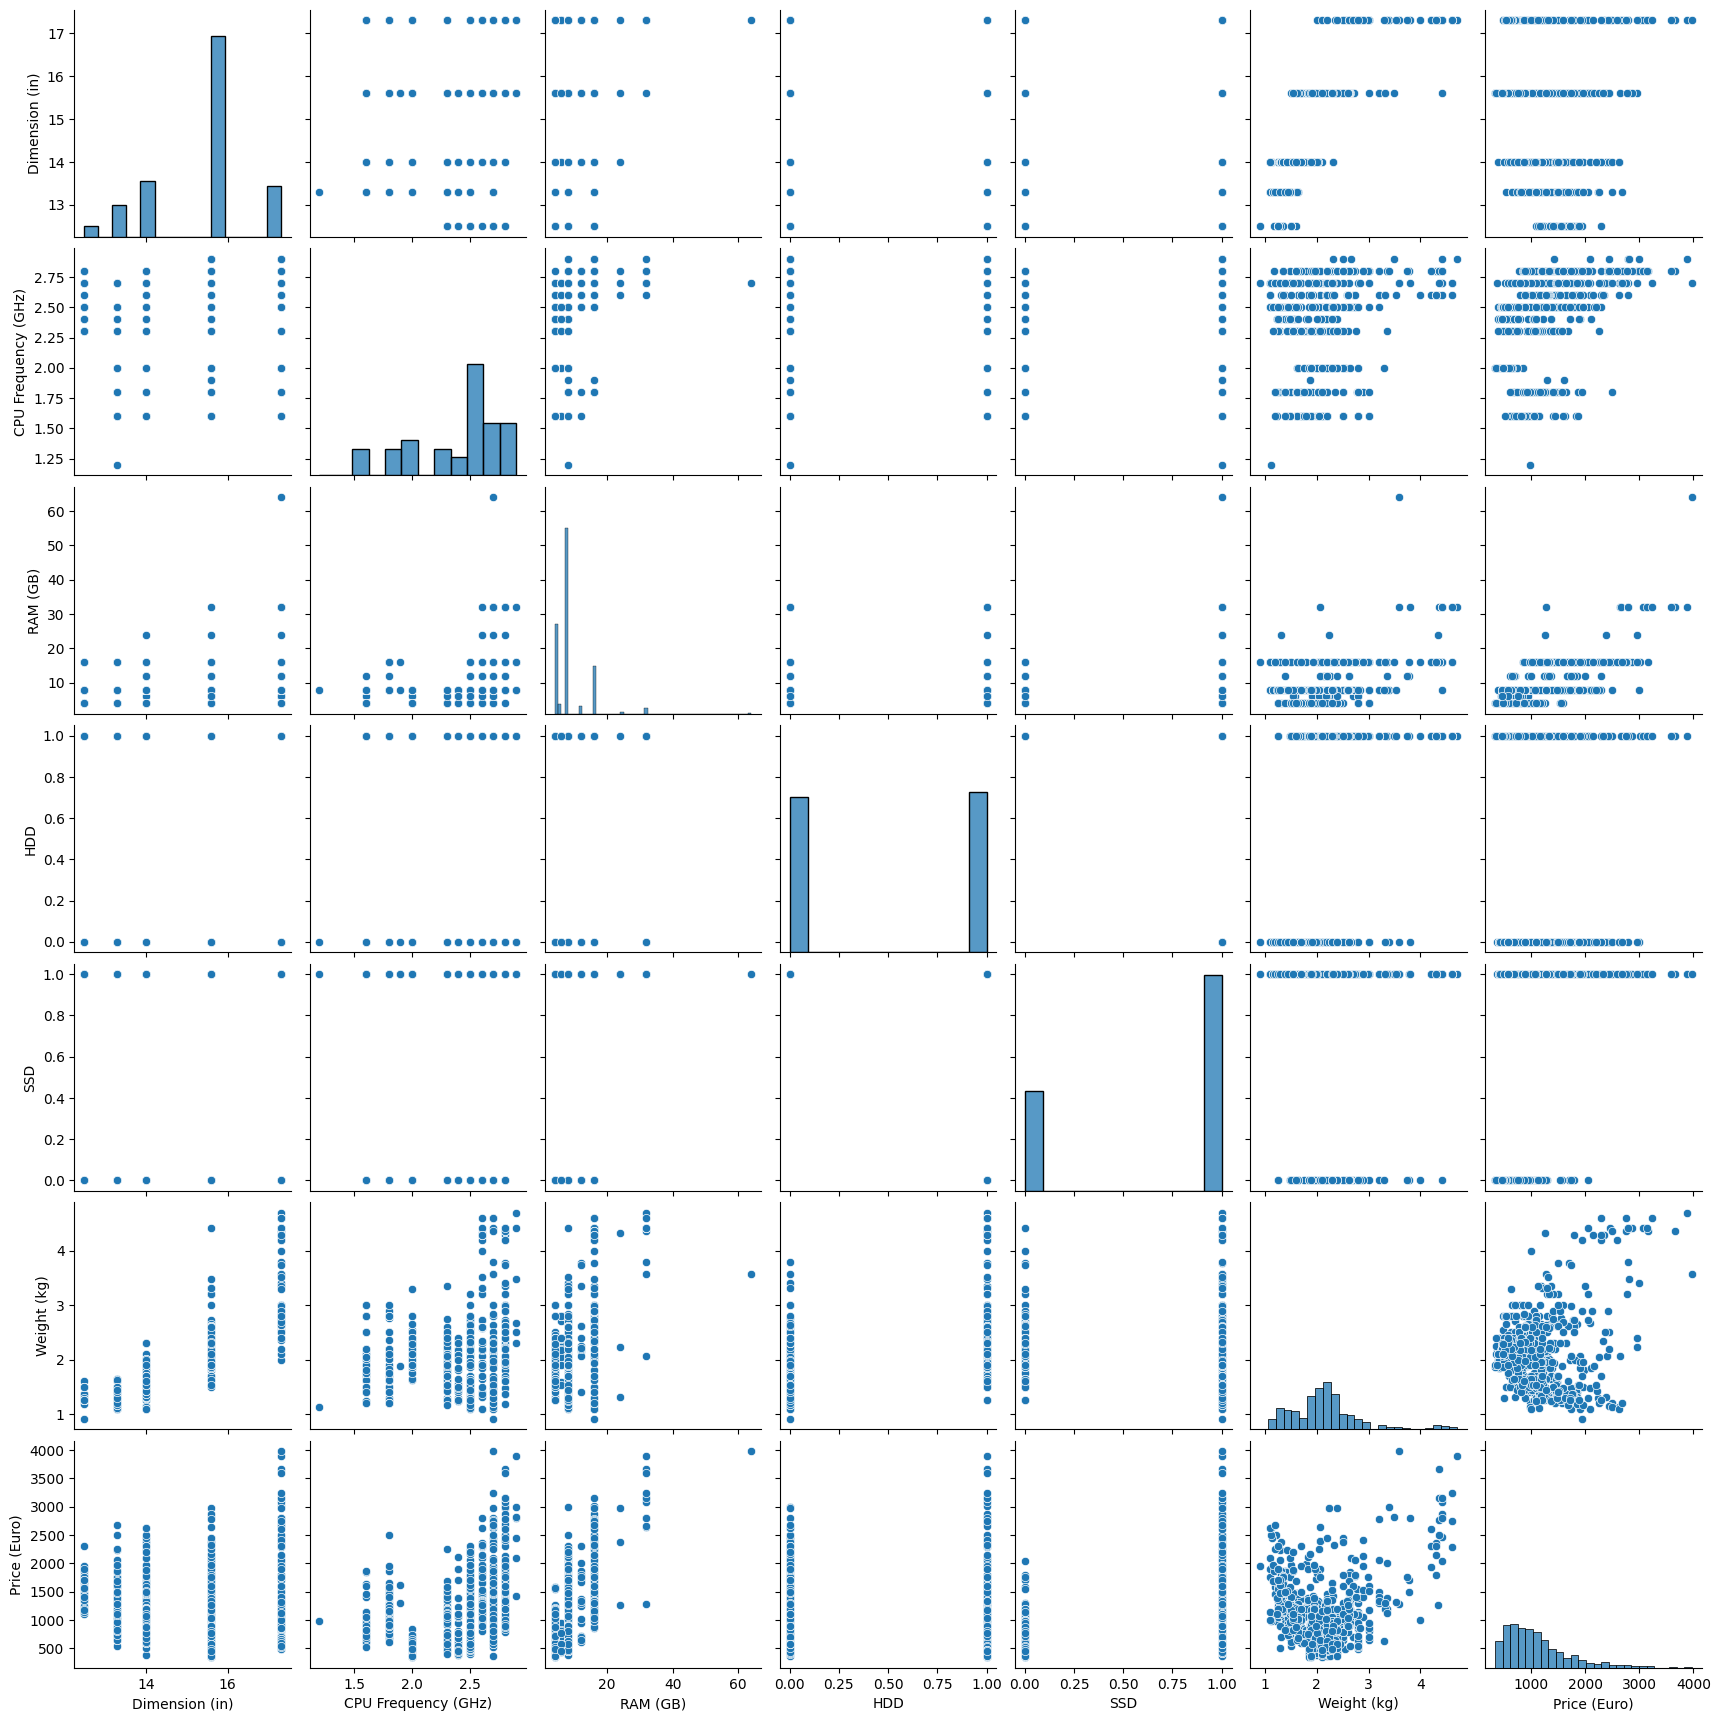

In [224]:
plot_pairwise_relationships(df)

In [225]:
### MANUALLY GRADED TASK
def plot_correlation_intensity(df):
    """
    Plot a heatmap showing the strength and direction of the Pearson correlation
    between all numeric variables in the dataset.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")

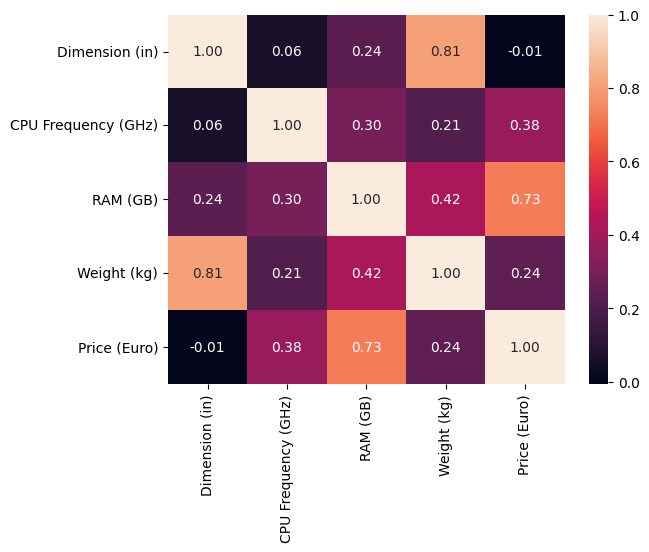

In [226]:
plot_correlation_intensity(df)

In [227]:
### MANUALLY GRADED TASK
def plot_price_distribution_per_type(df):
    """
    Create boxplots to show how laptop prices are distributed across different types.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    sns.boxplot(df, x="Price (Euro)", y="Type")

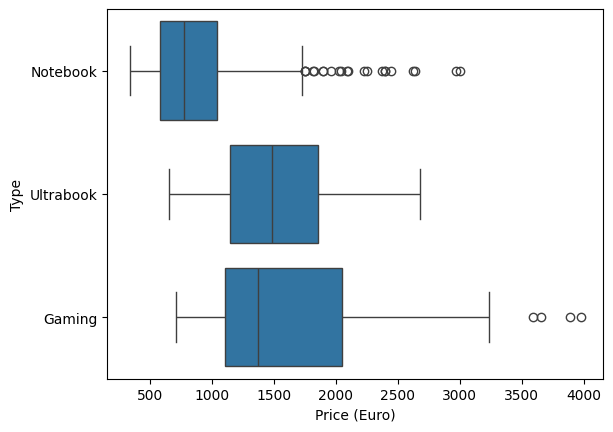

In [228]:
plot_price_distribution_per_type(df)

In [229]:
### MANUALLY GRADED TASK
def plot_laptop_count_per_type(df):
    """
    Create a bar plot showing the number of laptops available for each type.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    counts_per_type = df["Type"].value_counts()
    plt.bar(counts_per_type.index, counts_per_type)
    plt.xticks(rotation=90)
    plt.show()

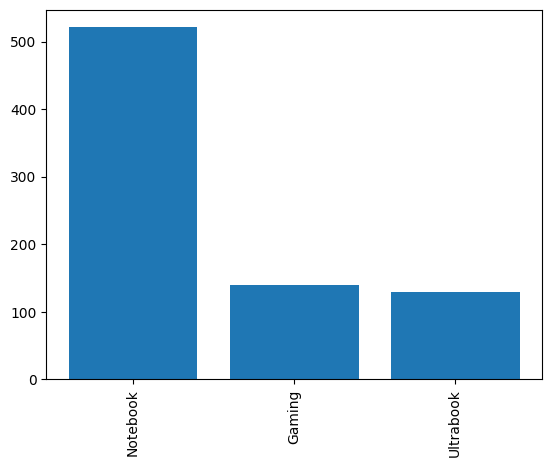

In [230]:
plot_laptop_count_per_type(df)

In [231]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_brand(df):
    """
    Encode the `Brand` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    one_hot_encoded_values = pd.get_dummies(df["Brand"])
    df = pd.concat([df.drop(columns=["Brand"]), one_hot_encoded_values], axis=1)
    # df = df.drop(columns=["Brand"])
    
    return df

In [232]:
df = encode_or_drop_brand(df)

In [233]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_brand(_df)
assert hash_data_frame(_df) == "bc0a5262a5a3c76876068bdd1d4aabc580e1a5d3e3bb5c508c59d5ed6a450c01"

In [234]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_model(df):
    """
    Encode the `Model` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    df = df.drop(columns=["Model"])
    
    return df

In [235]:
df = encode_or_drop_model(df)

In [236]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_model(_df)
assert hash_data_frame(_df) == "2fb7e211c86372837cd099c19a3eb368088d7a41b45f676c3281e5dab2558c8f"

In [237]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_type(df):
    """
    Encode the `Type` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    one_hot_encoded_values = pd.get_dummies(df["Type"])
    df = pd.concat([df.drop(columns=["Type"]), one_hot_encoded_values], axis=1)
    
    return df

In [238]:
df = encode_or_drop_type(df)

In [239]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_model(_df)
assert hash_data_frame(_df) == "2fb7e211c86372837cd099c19a3eb368088d7a41b45f676c3281e5dab2558c8f"

In [240]:
### AUTOMATICALLY GRADED TASK
def split_and_cast_screen_resolution(df):
    """
    Split the `Screen Resolution` column into two new integer columns
    `Horizontal Resolution` and `Vertical Resolution`. Add these columns to the dataset
    and remove the original `Screen Resolution` column.

    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    df[['Horizontal Resolution', 'Vertical Resolution']] = df['Screen Resolution'].str.split('x', expand=True)
    df['Horizontal Resolution'] = df['Horizontal Resolution'].astype(int)
    df['Vertical Resolution'] = df['Vertical Resolution'].astype(int)
    df = df.drop(columns=['Screen Resolution'])
    
    return df

In [241]:
df = split_and_cast_screen_resolution(df)

In [242]:
_df = pd.read_csv("laptops.csv")
_df = split_and_cast_screen_resolution(_df)
assert hash_data_frame(_df) == "09262c30e1d8b769fa7bf343438f9cd9e19377e13ce232cbaad8cdb09c43fd44"

In [243]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_cpu_brand(df):
    """
    Encode the `CPU Brand` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    df = df.drop(columns=["CPU Brand"])
    
    return df

In [244]:
df = encode_or_drop_cpu_brand(df)

In [245]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_cpu_brand(_df)
hash_data_frame(_df)
assert hash_data_frame(_df) == "3343d38a78aa5244e870b515abe379128a6cbdd0c0af4c427ea35bd2b9d4c0f4"

In [246]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_cpu_model(df):
    """
    Encode the `CPU Model` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    # df['CPU_Series'] = df['CPU Model'].str.extract(r'(i\d)')[0]
    
    # #Generation (prvata cifra od cetricifreniot broj)
    # df['CPU_Generation'] = df['CPU Model'].str.extract(r'(\d{4})')[0].astype(float) // 1000
    
    # # HQ (high performance) model
    # df['CPU_Is_HQ'] = df['CPU Model'].str.contains('HQ', na=False).astype(int)
    
    # df = df.drop('CPU Model', axis=1)
    
    # # One-hot encode за CPU_Series (i3, i5, i7)
    # df = pd.get_dummies(df, columns=['CPU_Series'], prefix='CPU')
    df = df.drop(columns=["CPU Model"])
    return df

In [247]:
df = encode_or_drop_cpu_model(df)

In [248]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_cpu_model(_df)
assert hash_data_frame(_df) == "2e6601709f90f761739234d4fd5a541c0524cd39155c1e657de44340e1de9b6b"

In [249]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_gpu_brand(df):
    """
    Encode the `GPU Brand` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    # raise NotImplementedError()
    one_hot_encoded_values = pd.get_dummies(df["GPU Brand"])
    df = pd.concat([df.drop(columns=["GPU Brand"]), one_hot_encoded_values], axis=1)

    return df

In [250]:
df = encode_or_drop_gpu_brand(df)

In [251]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_gpu_brand(_df)
assert hash_data_frame(_df) == "9d72d28212577a75e92e38a6ba043c38cf3e638619b85eb771d76b1e60a67e9e"

In [252]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_gpu_model(df):
    """
    Encode the `GPU Model` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    df = df.drop(columns=["GPU Model"])
    
    return df

In [253]:
df = encode_or_drop_gpu_model(df)

In [254]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_gpu_model(_df)
assert hash_data_frame(_df) == "2b9f5feb888687e9c01adb73dfb64d52e93e85c7356423028ce3b6ca35825b3a"

In [255]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_os(df):
    """
    Encode the `OS` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    one_hot_encoded_values = pd.get_dummies(df["OS"])
    df = pd.concat([df.drop(columns=["OS"]), one_hot_encoded_values], axis=1)
    
    return df

In [256]:
df = encode_or_drop_os(df)

In [257]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_os(_df)
assert hash_data_frame(_df) == "a3996c22b8e19ebc9ef0a3ae5625a9d05b41e3d05f81335345d3f6760a16ac54"

In [258]:
### AUTOMATICALLY GRADED TASK
def impute_hdd_and_ssd(df):
    """
    Fill in missing values in the `HDD` and `SSD` columns.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.

    Return the updated dataset as a `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    df['SSD']=df['SSD'].fillna(0)
    df['HDD']=df['HDD'].fillna(0)
    
    return df

In [259]:
df = impute_hdd_and_ssd(df)

In [213]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = impute_hdd_and_ssd(_df)
assert hash_data_frame(_df) == "48460c7730ee69a4b1138807c225223e328afd74b91f4c0de0377fe13d5af522"

KeyError: "['SDD'] not in index"

In [ ]:
df["Weight (kg)"].plot.hist()

In [ ]:
### AUTOMATICALLY GRADED TASK
def impute_weight(df):
    """
    Fill in missing values in the `Weight (kg)` column.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.

    Return the updated dataset as a `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    median_imputer = SimpleImputer(strategy="median")
    df[["Weight (kg)"]] = median_imputer.fit_transform(df[["Weight (kg)"]])
    
    return df

In [ ]:
df = impute_weight(df)

In [ ]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = impute_weight(_df)
assert hash_data_frame(_df) == "2dc75df9d166ac93c946a68940ea318bbff0c3881a25e58af7495203512340b0"

In [ ]:
### AUTOMATICALLY GRADED TASK
def partition_dataset(df):
    """
    Split the dataset into features (X) and target (y), where the target is `Price (Euro)`.
    Then, divide X and y into training and test sets using an 80:20 ratio.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.
    
    Return the sets in the following order: train_X, test_X, train_y, test_y.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    X, y = df.drop(columns=["Price (Euro)"]), df["Price (Euro)"]
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    
    return train_X, test_X, train_y, test_y

In [ ]:
train_X, test_X, train_y, test_y = partition_dataset(df)

In [ ]:
_df = pd.read_csv("laptops.csv")
_train_X, _test_X, _train_y, _test_y = partition_dataset(_df)
assert hash_data_frame(_train_X) == "04956da18ddf9c388d041b45004345b13b298ca0310967592c46e5c9b650de45"
assert hash_data_frame(_test_X) == "2be390f98b560ff81ecb70ac0630d81c50a932b68368f7f09b9d71ef02aaf23f"
assert hash_series(_train_y) == "314cbe0e97f0eade41a16b7ace6d97563f05a194f613947b3fc517b74472cf0a"
assert hash_series(_test_y) == "9211c8582f77328da6cfb22a0411523225a83f2bf4be9fabc60e97ab717c7601"

In [ ]:
### AUTOMATICALLY GRADED TASK
def fit_model(train_X, train_y):
    """
    Train a Lasso (L1-regularized) linear regression model with cross-validation.
    - Use `alphas=[0.001, 0.01, 0.1, 1.0, 10.0]`.
    - Perform 10-fold cross-validation to select the best `alpha`.

    Return the trained model.
    """

    # YOUR CODE HERE
    # raise NotImplementedError()
    model = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=10,random_state=RANDOM_STATE).fit(train_X, train_y)
    
    return model

In [ ]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1)).reshape(-1)

In [ ]:
model = fit_model(train_X, train_y)

In [ ]:
### TEST
_df = pd.read_csv("laptops.csv")
_model = fit_model(_df[["Dimension (in)", "CPU Frequency (GHz)", "RAM (GB)"]], _df["Price (Euro)"])
assert _model.alpha_.item() == 0.1
coef1, coef2, coef3 = _model.coef_.tolist()
assert int(coef1) == -91 and int(coef2) == 286 and int(coef3) == 83
assert int(_model.intercept_) == 1111

In [ ]:
pred_y = model.predict(test_X)

In [ ]:
pred_y = scaler.inverse_transform(pred_y.reshape(-1, 1)).reshape(-1)

In [ ]:
### MANUALLY GRADED TASK
def evaluate_model(test_y, pred_y):
    """
    Evaluate the model's predictions using different metrics.
    
    Print the results.
    """

    # YOUR CODE HERE
    # raise NotImplementedError()
    print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
    print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
    print(f"MSE: {mean_squared_error(test_y, pred_y)}")
    print(f"MSE: {root_mean_squared_error(test_y, pred_y)}")
    print(f"R2 Score: {r2_score(test_y, pred_y)}")

In [ ]:
evaluate_model(test_y, pred_y)

In [ ]:
### AUTOMATICALLY GRADED TASK
def perform_feature_selection(model, train_X, test_X):
    """
    Select features based on the trained model.
    Keep only the selected features in both training and test sets.

    Return the updated train_X and test_X.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    selected_columns = train_X.columns[model.coef_ != 0]
    train_X = train_X[selected_columns]
    test_X = test_X[selected_columns]
    
    return train_X, test_X 

In [ ]:
train_X, test_X = perform_feature_selection(model, train_X, test_X)

In [ ]:
### TEST
_df = pd.read_csv("laptops.csv")
_model = fit_model(_df[["Dimension (in)", "RAM (GB)"]][:500], _df["CPU Frequency (GHz)"][:500])
_train_X, _test_X = perform_feature_selection(_model, _df[["Dimension (in)", "RAM (GB)"]][:500], _df[["Dimension (in)", "RAM (GB)"]][500:])
assert hash_data_frame(_train_X) == "4610875da9717f5758faeccc5dec8e6555bc18967aaa058ad1b2b8b503101b57"
assert hash_data_frame(_test_X) == "a429556e734d7d17615e856fced0de8943c7914f54797d316c9c44e4d1144052"